In [1]:
def read_sce(folder_path):
    """Read a scFlow SingleCellExperiment from a folder into an AnnData Object
    Parameters
    ---------
    folder_path: str
        Folder path to the previously saved SingleCellExperiment from scFlow

    Returns
    ---------
    adata: AnnData
        An AnnData object
    """

    assert_that(folder_path, instance_of(str))
    print("hello world")

In [5]:
read_sce("~/")
# see https://anndata.readthedocs.io/en/stable/anndata.AnnData.html

NameError: name 'assert_that' is not defined

In [14]:
folder_path = '/home/ckhozoie/Documents/junk/final_sce'

In [15]:
folder_path + "/matrix.mtx.gz"

'/home/ckhozoie/Documents/junk/final_sce/matrix.mtx.gz'

In [43]:

from anndata import read_mtx
import pandas as pd
from pathlib import Path

In [46]:
folder_path = Path(folder_path)

In [173]:
adata = read_mtx(folder_path / "matrix.mtx.gz")


In [175]:
coldata = pd.read_csv(folder_path / 'sce-coldata.tsv', header=0, sep='\t')

In [174]:
adata = adata.transpose() # transposed vs dataframe

In [176]:
adata.obs = coldata
adata.var = rowdata
adata.var_names = adata.var["gene"]
adata.obs_names = adata.var["barcode"]

In [177]:
rowdata = pd.read_csv(folder_path / 'sce-rowdata.tsv', header=0, sep='\t')

In [ ]:
adata.obsm = 

In [178]:
adata

AnnData object with n_obs × n_vars = 12439 × 9809
    obs: 'barcode', 'manifest', 'individual', 'diagnosis', 'sex', 'age', 'total_counts', 'total_features_by_counts', 'pc_mito', 'pc_ribo', 'clusters', 'partitions', 'cluster_celltype'
    var: 'ensembl_gene_id', 'gene_biotype', 'gene', 'percentage_gene_gc_content', 'total_counts', 'n_cells_by_counts'
    obsm: 'barcode'
    varm: 'ensembl_gene_id'

In [137]:
rd = pd.read_csv(folder_path / 'ReducedDim_UMAP3D_Liger.tsv', header=0, sep='\t')

In [182]:
adata.obsm["UMAP3D_Liger"] = rd.values

In [200]:
adata.var_names = adata.var["gene"]

In [201]:
adata

AnnData object with n_obs × n_vars = 12439 × 9809
    obs: 'barcode', 'manifest', 'individual', 'diagnosis', 'sex', 'age', 'total_counts', 'total_features_by_counts', 'pc_mito', 'pc_ribo', 'clusters', 'partitions', 'cluster_celltype'
    var: 'ensembl_gene_id', 'gene_biotype', 'gene', 'percentage_gene_gc_content', 'total_counts', 'n_cells_by_counts'
    obsm: 'barcode', 'UMAP3D_Liger'
    varm: 'ensembl_gene_id'

In [131]:
adata

AnnData object with n_obs × n_vars = 9809 × 12439
    obs: 'ensembl_gene_id', 'gene_biotype', 'gene', 'percentage_gene_gc_content', 'total_counts', 'n_cells_by_counts'
    var: 'barcode', 'manifest', 'individual', 'diagnosis', 'sex', 'age', 'total_counts', 'total_features_by_counts', 'pc_mito', 'pc_ribo', 'clusters', 'partitions', 'cluster_celltype'
    varm: 'UMAP3D_Liger'

In [126]:
adata

AnnData object with n_obs × n_vars = 9809 × 12439
    obs: 'ensembl_gene_id', 'gene_biotype', 'gene', 'percentage_gene_gc_content', 'total_counts', 'n_cells_by_counts'
    var: 'barcode', 'manifest', 'individual', 'diagnosis', 'sex', 'age', 'total_counts', 'total_features_by_counts', 'pc_mito', 'pc_ribo', 'clusters', 'partitions', 'cluster_celltype'
    varm: 'UMAP3D_Liger'

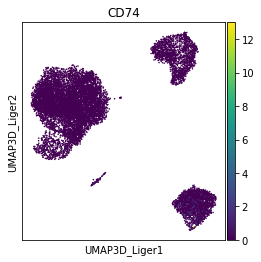

In [202]:
import scanpy as sc
import pandas as pd
from matplotlib.pyplot import rc_context
# rc_context is used for the figure size, in this case 4x4
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.embedding(adata, "UMAP3D_Liger", color = "CD74")

In [56]:
genes = pd.read_csv(folder_path / 'features.tsv.gz', header=None, sep='\t')

In [62]:
adata.barcode = pd.read_csv(folder_path / 'barcodes.tsv.gz', header=None)[0]

ValueError: Length of passed value for obs_names is 12439, but this AnnData has shape: (9809, 12439)

0          bavaf_6_Teinh_1
1          bavaf_6_Teinh_2
2          bavaf_6_Teinh_3
3          bavaf_6_Teinh_4
4          bavaf_6_Teinh_6
               ...        
12434    zoron_4_MOL1_2174
12435    zoron_4_MOL1_2175
12436    zoron_4_MOL1_2176
12437    zoron_4_MOL1_2177
12438    zoron_4_MOL1_2178
Name: 0, Length: 12439, dtype: object

In [65]:
 pd.read_csv(folder_path / 'barcodes.tsv.gz', header=None)[0]

0          bavaf_6_Teinh_1
1          bavaf_6_Teinh_2
2          bavaf_6_Teinh_3
3          bavaf_6_Teinh_4
4          bavaf_6_Teinh_6
               ...        
12434    zoron_4_MOL1_2174
12435    zoron_4_MOL1_2175
12436    zoron_4_MOL1_2176
12437    zoron_4_MOL1_2177
12438    zoron_4_MOL1_2178
Name: 0, Length: 12439, dtype: object

In [66]:
adata.var['ensembl_gene_id'] = genes[0].values

ValueError: Length of values (9809) does not match length of index (12439)

In [34]:
def _read_v3_10x_mtx_mod(
    path,
    var_names='gene_symbols',
    make_unique=True,
    cache=False,
    cache_compression=_empty,
):
    """
    Read mex from output from Cell Ranger v3 or later versions
    """
    path = Path(path)
    adata = read(
        path / 'matrix.mtx.gz',
        cache=cache,
        cache_compression=cache_compression
    ).T  # transpose the data
    genes = pd.read_csv(path / 'features.tsv.gz', header=None, sep='\t')
    if var_names == 'gene_symbols':
        var_names = genes[1]
        if make_unique:
            var_names = anndata.utils.make_index_unique(pd.Index(var_names))
        adata.var_names = var_names
        adata.var['gene_ids'] = genes[0].values
    elif var_names == 'gene_ids':
        adata.var_names = genes[0]
        adata.var['gene_symbols'] = genes[1].values
    else:
        raise ValueError("`var_names` needs to be 'gene_symbols' or 'gene_ids'")
    adata.var['feature_types'] = genes[2].values
    adata.obs_names = pd.read_csv(path / 'barcodes.tsv.gz', header=None)[0]
    return adata

NameError: name '_empty' is not defined